# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

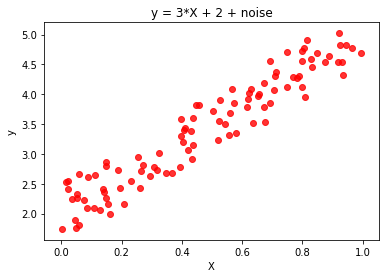

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 100)
X = np.random.uniform(0, 1, 100)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3*X + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta - (y - \hat{y}) \cdot x\\
b & = b - (y - \hat{y})
\end{align*}$